In [10]:
import json

# Load the JSON data (assuming the file is in the same directory)
file_path = "data.json"

try:
    with open(file_path, "r", encoding="utf-8") as file:
        data = json.load(file)

    # Access the list of movies under the 'movies_data' key
    movies = data.get('movies_data', [])
    print(f"Number of movies: {len(movies)}")

    # Display a sample movie
    if movies:
        print("First movie entry:")
        print(movies[0])
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except json.JSONDecodeError as e:
    print(f"Error: Invalid JSON format. {e}")






Number of movies: 245
First movie entry:
{'title': 'Pink Floyd: The Wall', 'release_date': '1982-07-14', 'budget': 12000000, 'box_office': 22182877, 'production_company': 'Metro-Goldwyn-Mayer (MGM)', 'duration': 95, 'director': 'Alan Parker', 'director_country': 'United Kingdom', 'genre': 'Musical', 'subgenre': 'Drama', 'personal_rating': 4.5, 'imdb_rating': 8.0, 'rym_rating': 4.12}


Number of movies: 245
First movie: {'title': 'Pink Floyd: The Wall', 'release_date': '1982-07-14', 'budget': 12000000, 'box_office': 22182877, 'production_company': 'Metro-Goldwyn-Mayer (MGM)', 'duration': 95, 'director': 'Alan Parker', 'director_country': 'United Kingdom', 'genre': 'Musical', 'subgenre': 'Drama', 'personal_rating': 4.5, 'imdb_rating': 8.0, 'rym_rating': 4.12}


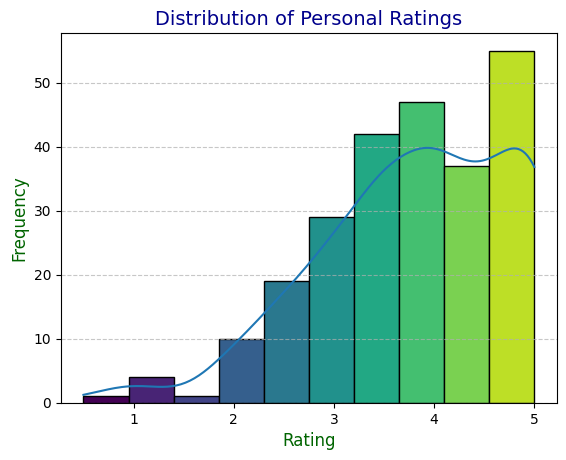

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example data
ratings = [movie['personal_rating'] for movie in movies]

# Create the histogram with KDE
hist_data = sns.histplot(ratings, kde=True, bins=10, edgecolor='black')

# Apply a colormap to each bar
colormap = plt.cm.viridis  # Choose your preferred colormap
bars = hist_data.patches

for i, bar in enumerate(bars):
    bar.set_facecolor(colormap(i / len(bars)))

# Customize the plot
plt.title('Distribution of Personal Ratings', fontsize=14, color='darkblue')
plt.xlabel('Rating', fontsize=12, color='darkgreen')
plt.ylabel('Frequency', fontsize=12, color='darkgreen')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional grid customization

# Show the plot
plt.show()


UFuncTypeError: Cannot cast ufunc 'svd_n_s' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

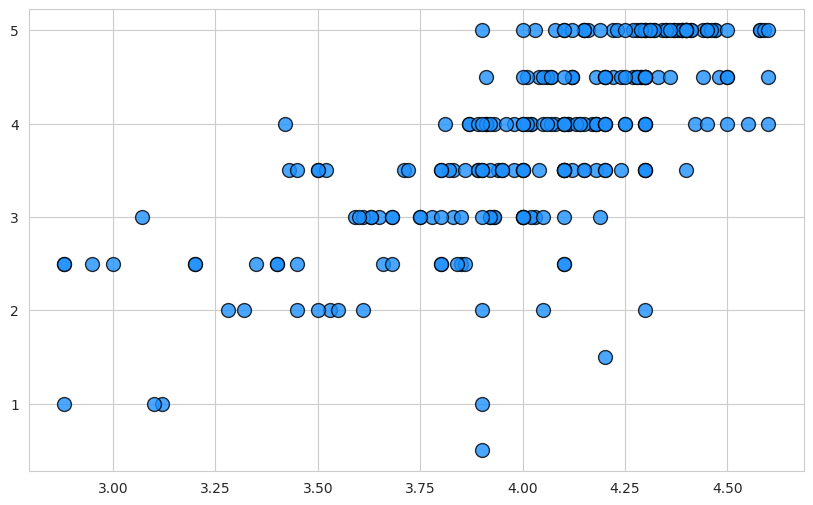

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for regression plot
rym_ratings = [movie['rym_rating'] for movie in movies]
personal_ratings = [movie['personal_rating'] for movie in movies]

# Set the style of the plot
sns.set_style("whitegrid")  # A clean and professional style

# Create the regression plot
plt.figure(figsize=(10, 6))  # Adjust the figure size for better readability
sns.regplot(
    x=rym_ratings,
    y=personal_ratings,
    scatter_kws={
        'color': 'dodgerblue',  # Color of the scatter points
        's': 100,  # Size of the points
        'alpha': 0.8,  # Transparency for better aesthetics
        'edgecolor': 'black'  # Outline color for scatter points
    },
    line_kws={
        'color': 'darkorange',  # Color of the regression line
        'linewidth': 2  # Thickness of the regression line
    }
)

# Customize the plot
plt.title('Personal Ratings vs. RYM Ratings', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('RYM Rating', fontsize=14, color='darkgreen')
plt.ylabel('Personal Rating', fontsize=14, color='darkgreen')

# Add limits and gridlines
plt.xlim(min(rym_ratings) - 0.5, max(rym_ratings) + 0.5)
plt.ylim(min(personal_ratings) - 0.5, max(personal_ratings) + 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines behind the points

# Add a subtitle or annotation
plt.text(
    max(rym_ratings) - 1, min(personal_ratings) + 0.5,
    'Exploring relationships between personal and public ratings',
    fontsize=10, color='gray'
)

# Show the plot
plt.show()


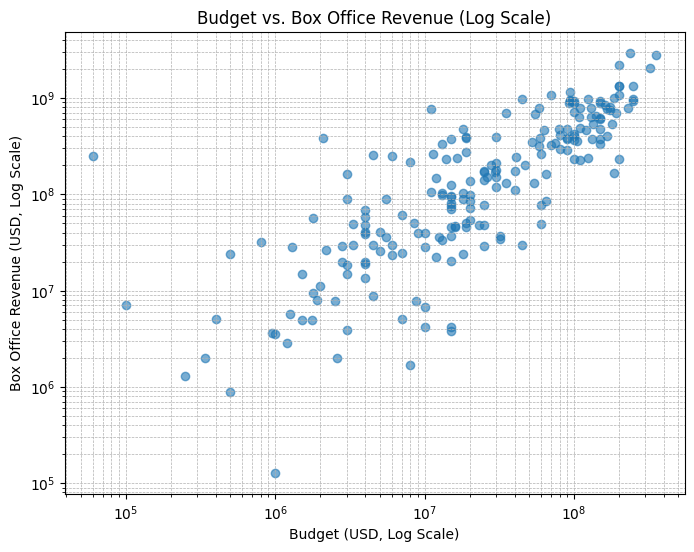

In [23]:
import numpy as np

# Extract budget and box office data
budgets = [movie['budget'] for movie in movies]
box_offices = [movie['box_office'] for movie in movies]

# Plot with logarithmic scaling
plt.figure(figsize=(8, 6))
plt.scatter(budgets, box_offices, alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.title('Budget vs. Box Office Revenue (Log Scale)')
plt.xlabel('Budget (USD, Log Scale)')
plt.ylabel('Box Office Revenue (USD, Log Scale)')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()



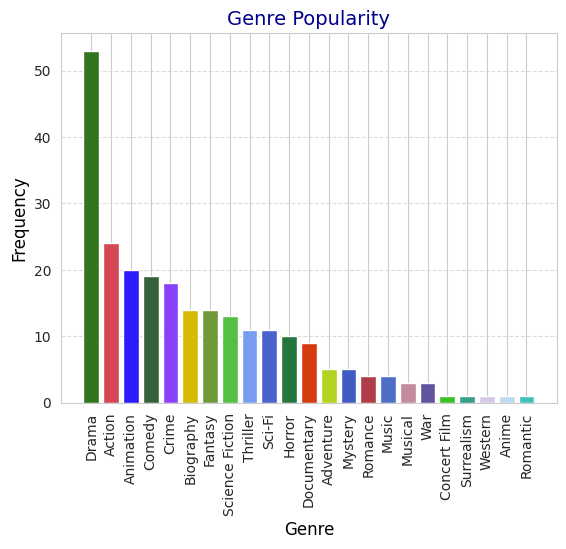

In [40]:
import matplotlib.pyplot as plt
import random
from collections import Counter

# Example data
genres = [movie['genre'] for movie in movies]
genre_counts = Counter(genres)

# Sort genres by frequency (descending order)
sorted_genre_counts = dict(sorted(genre_counts.items(), key=lambda item: item[1], reverse=True))

# Generate random colors for each bar
random_colors = [f'#{random.randint(0, 0xFFFFFF):06x}' for _ in sorted_genre_counts]

# Create the bar chart with random colors
plt.bar(sorted_genre_counts.keys(), sorted_genre_counts.values(), color=random_colors)
plt.title('Genre Popularity', fontsize=14, color='darkblue')
plt.xlabel('Genre', fontsize=12, color='black')
plt.ylabel('Frequency', fontsize=12, color='black')
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [38]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Convert the movies data into a DataFrame
df = pd.DataFrame(movies)

# Discretize revenue into categories: Low, Medium, High
df['revenue_category'] = pd.qcut(df['box_office'], q=3, labels=['Low', 'Medium', 'High'])

# Discretize ratings into categories: Low, Medium, High
df['personal_rating_category'] = pd.qcut(df['personal_rating'], q=3, labels=['Low', 'Medium', 'High'])
df['imdb_rating_category'] = pd.qcut(df['imdb_rating'], q=3, labels=['Low', 'Medium', 'High'])
df['rym_rating_category'] = pd.qcut(df['rym_rating'], q=3, labels=['Low', 'Medium', 'High'])

# Function to perform Chi-square test
def perform_chi_square_test(df, revenue_col, rating_col):
    contingency_table = pd.crosstab(df[revenue_col], df[rating_col])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p

# Chi-square test for Personal Ratings
chi2_personal, p_personal = perform_chi_square_test(df, 'revenue_category', 'personal_rating_category')
print(f"Chi-square test for Revenue vs. Personal Ratings: Chi2={chi2_personal}, p-value={p_personal}")

# Chi-square test for IMDB Ratings
chi2_imdb, p_imdb = perform_chi_square_test(df, 'revenue_category', 'imdb_rating_category')
print(f"Chi-square test for Revenue vs. IMDB Ratings: Chi2={chi2_imdb}, p-value={p_imdb}")

# Chi-square test for RYM Ratings
chi2_rym, p_rym = perform_chi_square_test(df, 'revenue_category', 'rym_rating_category')
print(f"Chi-square test for Revenue vs. RYM Ratings: Chi2={chi2_rym}, p-value={p_rym}")


Chi-square test for Revenue vs. Personal Ratings: Chi2=19.09593789206504, p-value=0.0007525556417063393
Chi-square test for Revenue vs. IMDB Ratings: Chi2=7.341625959117045, p-value=0.1188991246394403
Chi-square test for Revenue vs. RYM Ratings: Chi2=7.777718692867435, p-value=0.10006849948510817


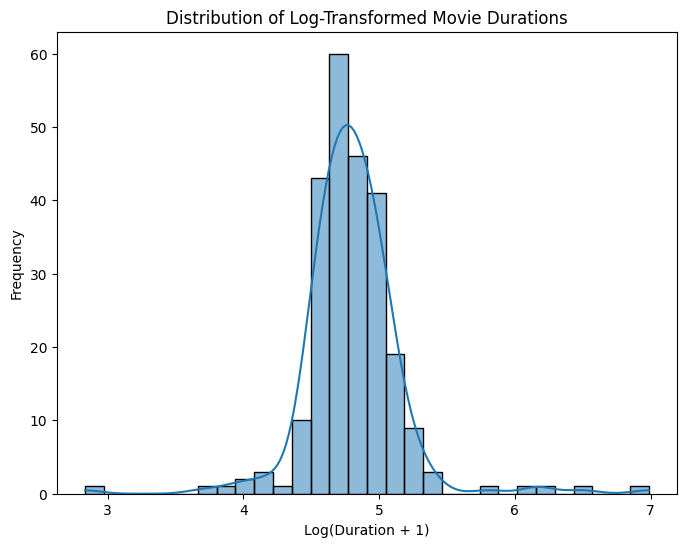

In [20]:
# Extract movie durations
durations = [movie['duration'] for movie in movies]

# Logarithmic Transformation (if needed)
import numpy as np
log_durations = np.log1p(durations)  # Apply log transformation

# Plot with logarithmic transformation
plt.figure(figsize=(8, 6))
sns.histplot(log_durations, bins=30, kde=True)
plt.title('Distribution of Log-Transformed Movie Durations')
plt.xlabel('Log(Duration + 1)')
plt.ylabel('Frequency')
plt.show()



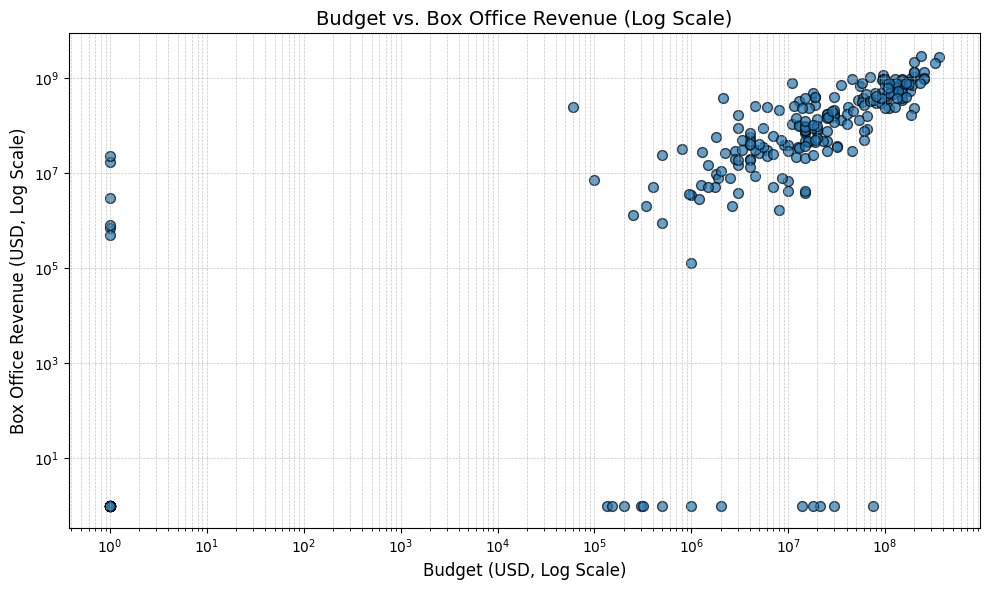

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Extract budget and box office data, handling None values
budgets = [movie['budget'] if movie['budget'] is not None else 0 for movie in movies]
box_offices = [movie['box_office'] if movie['box_office'] is not None else 0 for movie in movies]

# Add a small offset to avoid log(0) errors
budgets = np.array(budgets) + 1
box_offices = np.array(box_offices) + 1

# Plot with logarithmic scaling
plt.figure(figsize=(10, 6))
plt.scatter(budgets, box_offices, alpha=0.7, s=50, edgecolor='k')
plt.xscale('log')
plt.yscale('log')
plt.title('Budget vs. Box Office Revenue (Log Scale)', fontsize=14)
plt.xlabel('Budget (USD, Log Scale)', fontsize=12)
plt.ylabel('Box Office Revenue (USD, Log Scale)', fontsize=12)
plt.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()





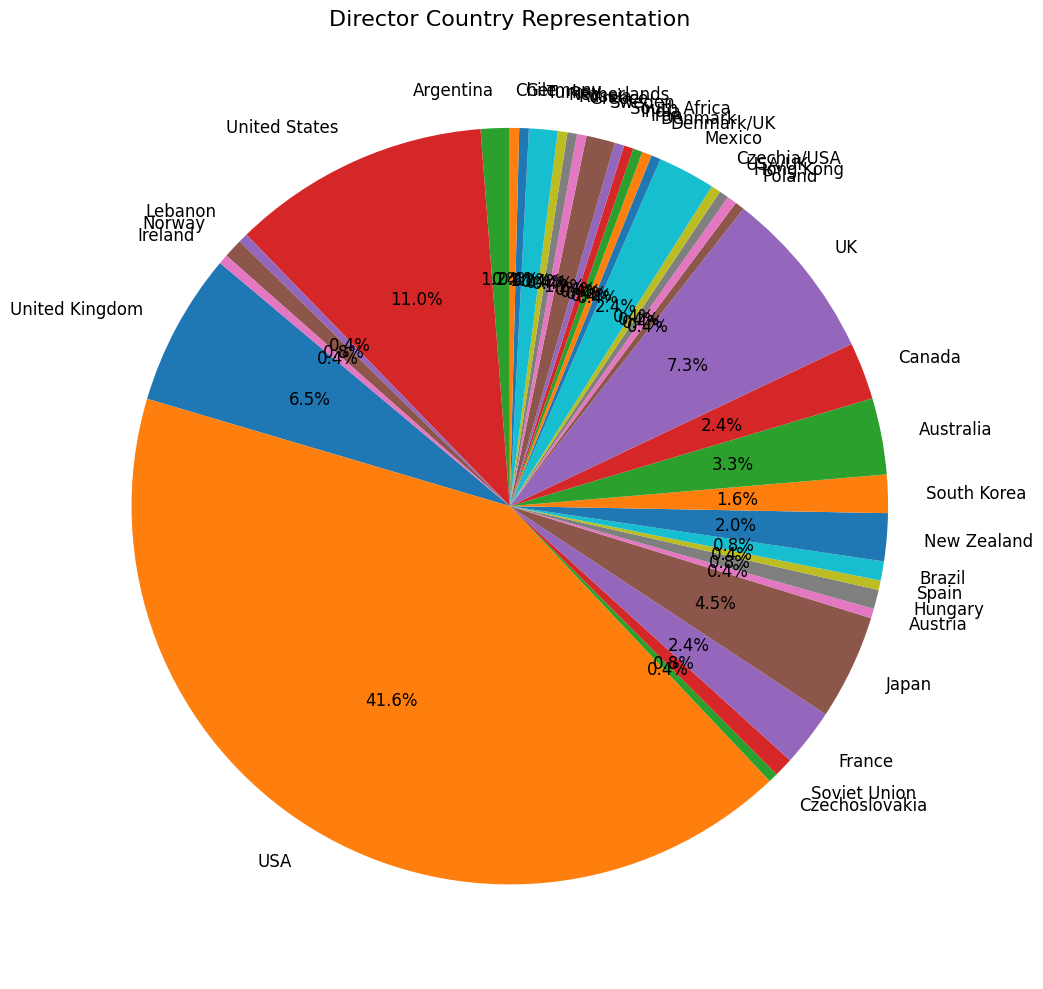

In [37]:
import matplotlib.pyplot as plt
from collections import Counter

# Extract director countries
director_countries = [movie['director_country'] for movie in movies if movie['director_country']]

# Count occurrences of each country
country_counts = Counter(director_countries)

# Plot the pie chart
plt.figure(figsize=(14, 10))  # Increase figure size
plt.pie(
    country_counts.values(),
    labels=country_counts.keys(),
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 12},  # Increase font size for better readability
)
plt.title('Director Country Representation', fontsize=16)
plt.tight_layout()  # Adjust padding to fit everything nicely
plt.show()



TypeError: '<' not supported between instances of 'NoneType' and 'float'

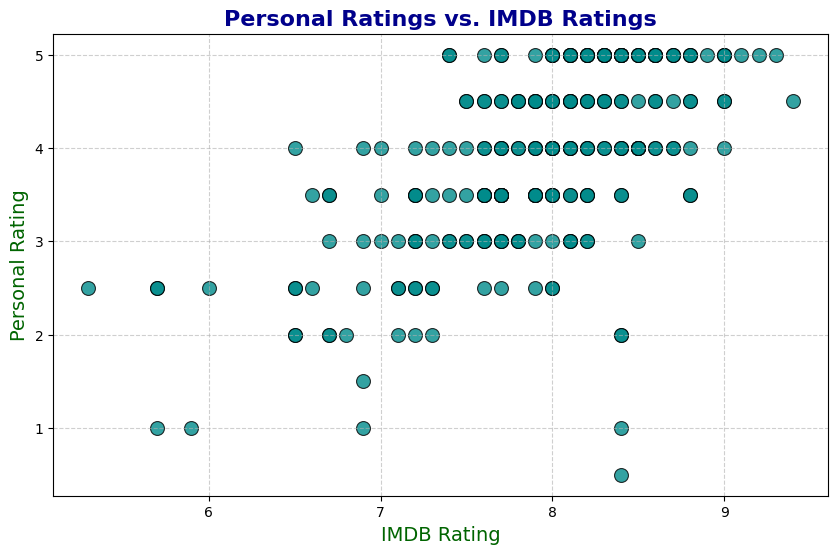

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for scatter plot
imdb_ratings = [movie['imdb_rating'] for movie in movies]
personal_ratings = [movie['personal_rating'] for movie in movies]

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size for better readability
sns.scatterplot(
    x=imdb_ratings,
    y=personal_ratings,
    color='darkcyan',  # A personalized color for points
    edgecolor='black',  # Outline for better visibility
    s=100,  # Increase size of points
    alpha=0.8  # Add slight transparency
)

# Add gridlines for readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add titles and labels with a personalized touch
plt.title('Personal Ratings vs. IMDB Ratings', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('IMDB Rating', fontsize=14, color='darkgreen')
plt.ylabel('Personal Rating', fontsize=14, color='darkgreen')


# Set limits and ticks for better alignment
plt.xlim(min(imdb_ratings) - 0.5, max(imdb_ratings) + 0.5)
plt.ylim(min(personal_ratings) - 0.5, max(personal_ratings) + 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


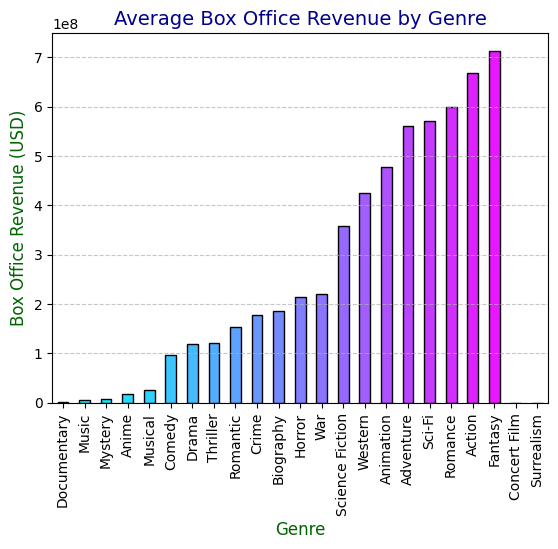

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Example DataFrame
df = pd.DataFrame(movies)

# Calculate average box office revenue by genre
genre_revenues = df.groupby('genre')['box_office'].mean().sort_values()

# Generate colors from red to blue using a colormap
colors = plt.cm.cool(np.linspace(0, 1, len(genre_revenues)))

# Plot the bar chart with custom colors and grid
genre_revenues.plot(kind='bar', color=colors, edgecolor='black')

# Customize the plot
plt.title('Average Box Office Revenue by Genre', fontsize=14, color='darkblue')
plt.xlabel('Genre', fontsize=12, color='darkgreen')
plt.ylabel('Box Office Revenue (USD)', fontsize=12, color='darkgreen')
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Gridlines behind the bars

# Show the plot
plt.show()


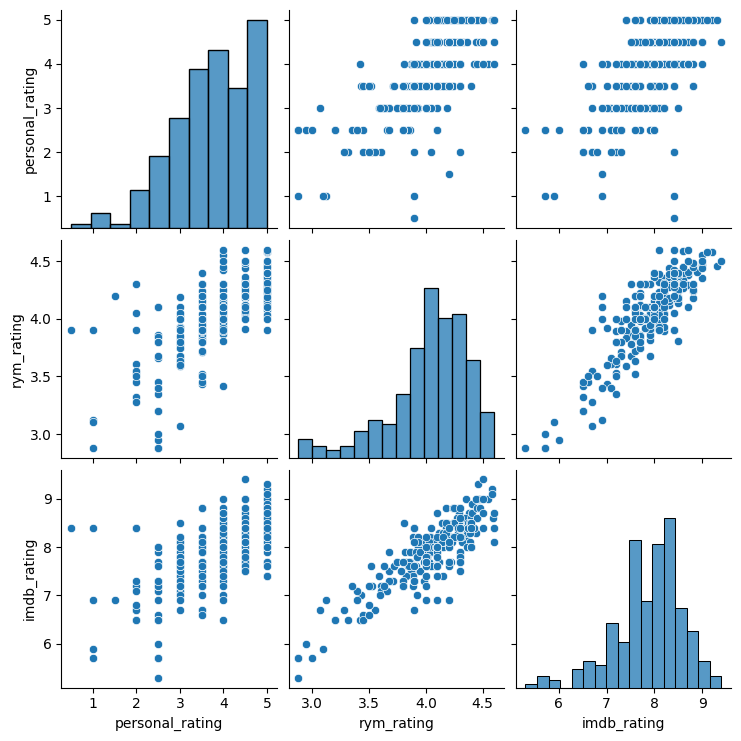

In [35]:
sns.pairplot(pd.DataFrame(movies)[['personal_rating', 'rym_rating', 'imdb_rating']])
plt.show()


Mean Squared Error: 0.3558

Feature Importances:
       Feature  Importance
4   rym_rating    0.498583
3  imdb_rating    0.165278
0       budget    0.134013
2     duration    0.103076
1   box_office    0.099050


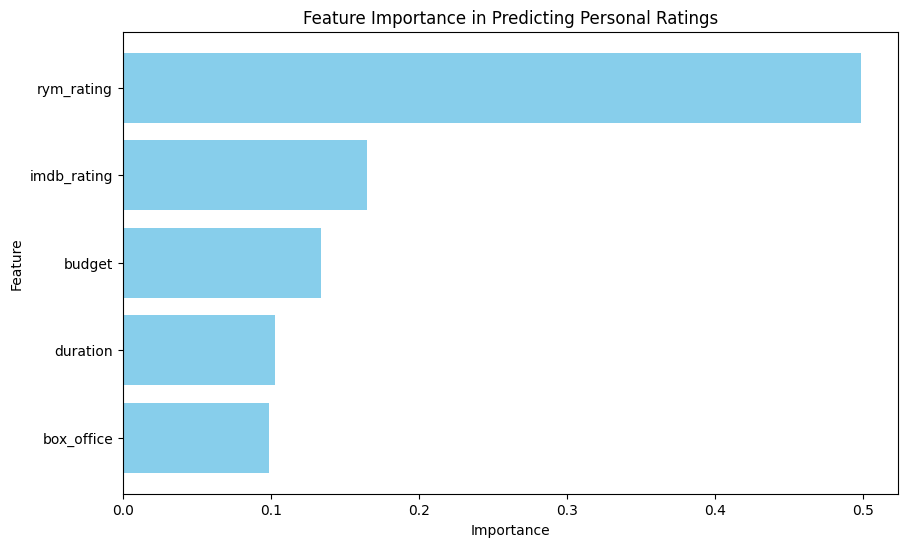

In [38]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Convert your movie data to a DataFrame
df = pd.DataFrame(movies)

# Drop rows with missing personal ratings or other parameters
df = df.dropna(subset=['personal_rating'])

# Define the target (personal_rating) and features
target = 'personal_rating'
features = ['budget', 'box_office', 'duration', 'imdb_rating', 'rym_rating']  # Add other numerical features as needed

X = df[features]
y = df[target]

# Handle missing values in the features (if any)
X = X.fillna(0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Feature importance
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
print("\nFeature Importances:")
print(feature_importance_df)

# Plot feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting Personal Ratings')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [19]:
import pandas as pd
from scipy.stats import chi2_contingency

# Categorize RYM Rating and Personal Rating into bins
bins = [0, 2, 4, 5]  # Example bins for ratings: low, medium, high
labels = ['Low', 'Medium', 'High']

df['rym_category'] = pd.cut(df['rym_rating'], bins=bins, labels=labels, include_lowest=True)
df['personal_category'] = pd.cut(df['personal_rating'], bins=bins, labels=labels, include_lowest=True)

# Create a contingency table
contingency_table = pd.crosstab(df['rym_category'], df['personal_category'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output results
print("Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-Value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpret the result
alpha = 0.05  # Significance level
if p < alpha:
    print("\nResult: The relationship between RYM Rating and Personal Rating is statistically significant.")
else:
    print("\nResult: No significant relationship between RYM Rating and Personal Rating.")


Chi-Square Test Results:
Chi-Square Statistic: 78.2554
P-Value: 0.0000
Degrees of Freedom: 2
Expected Frequencies:
[[ 6.32098765 53.72839506 35.95061728]
 [ 9.67901235 82.27160494 55.04938272]]

Result: The relationship between RYM Rating and Personal Rating is statistically significant.


In [39]:
# Discretize IMDB ratings and personal ratings into categories
df['imdb_rating_category'] = pd.qcut(df['imdb_rating'], q=3, labels=['Low', 'Medium', 'High'])
df['personal_rating_category'] = pd.qcut(df['personal_rating'], q=3, labels=['Low', 'Medium', 'High'])

# Create a contingency table
contingency_table = pd.crosstab(df['imdb_rating_category'], df['personal_rating_category'])

# Perform Chi-square test
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square test for IMDB Ratings vs. Personal Ratings: Chi2={chi2}, p-value={p}")


Chi-square test for IMDB Ratings vs. Personal Ratings: Chi2=81.05875656785652, p-value=1.0391304848796049e-16


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

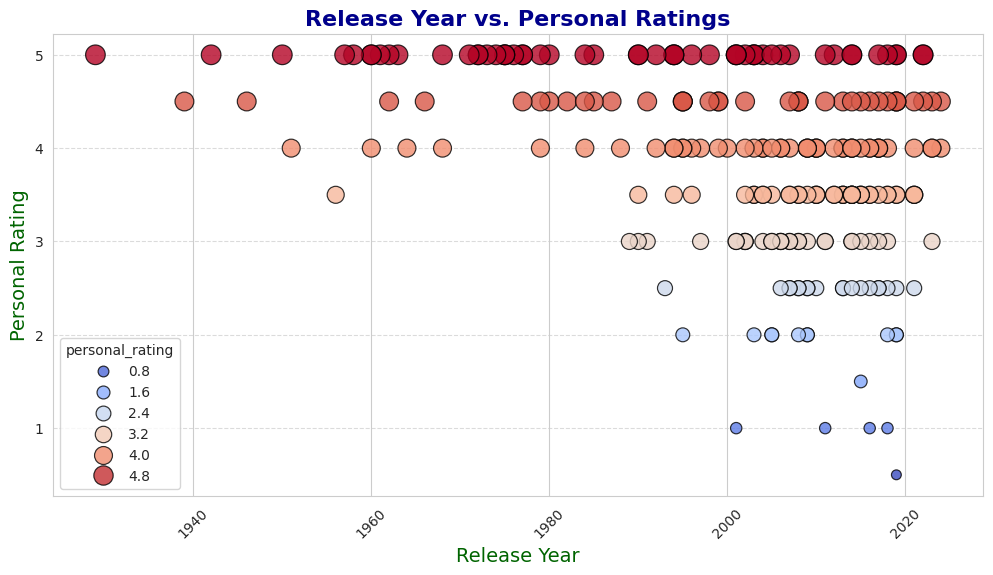

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the movies data into a DataFrame
df = pd.DataFrame(movies)

# Extract the release year from the release_date column
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

# Filter out rows with missing release_year or personal_rating
df = df.dropna(subset=['release_year', 'personal_rating'])

# Create a scatter plot
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    data=df,
    x='release_year',
    y='personal_rating',
    hue='personal_rating',  # Color points based on personal ratings
    palette='coolwarm',  # Use an engaging color palette
    size='personal_rating',  # Size points based on personal ratings
    sizes=(50, 200),  # Scale point sizes
    alpha=0.8,  # Slight transparency
    edgecolor='black'  # Outline points
)

# Customize the plot
plt.title('Release Year vs. Personal Ratings', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Release Year', fontsize=14, color='darkgreen')
plt.ylabel('Personal Rating', fontsize=14, color='darkgreen')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.colorbar(scatter.collections[0].colorbar, label='Personal Rating')  # Add a color bar for reference
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-36-5d52bdaee0d2>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


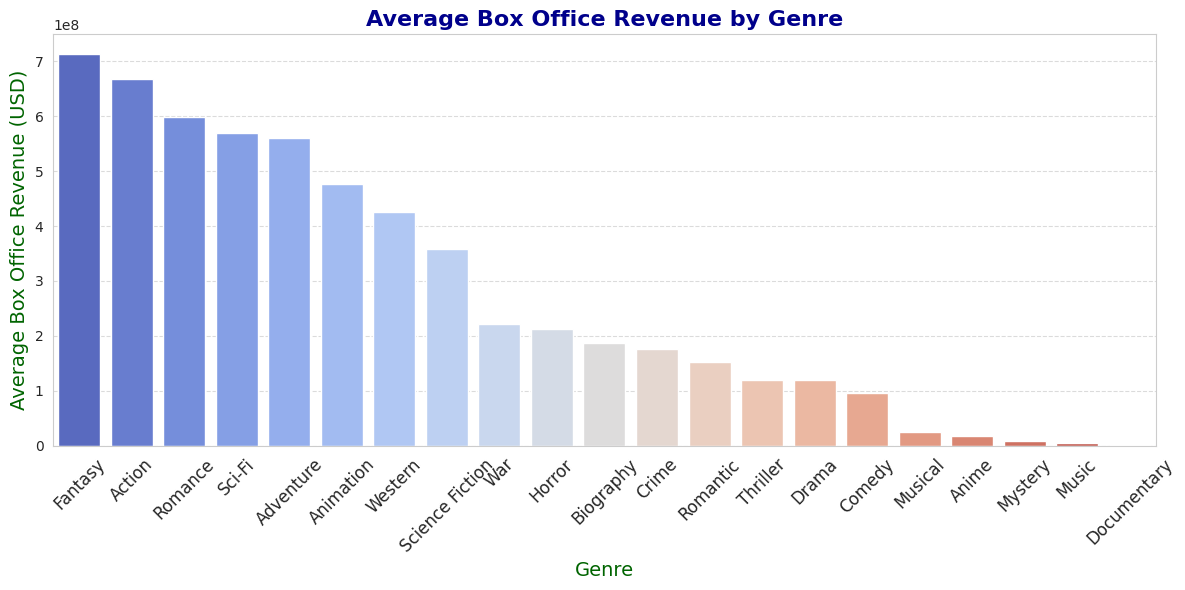

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the movies data into a DataFrame
df = pd.DataFrame(movies)

# Filter out rows with missing genre or box_office values
df = df.dropna(subset=['genre', 'box_office'])

# Calculate the average box office revenue for each genre
genre_revenues = df.groupby('genre')['box_office'].mean().sort_values(ascending=False)

# Create a bar chart for genre vs. average box office revenue
plt.figure(figsize=(12, 6))
sns.barplot(
    x=genre_revenues.index,
    y=genre_revenues.values,
    palette='coolwarm'
)

# Customize the plot
plt.title('Average Box Office Revenue by Genre', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Genre', fontsize=14, color='darkgreen')
plt.ylabel('Average Box Office Revenue (USD)', fontsize=14, color='darkgreen')
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

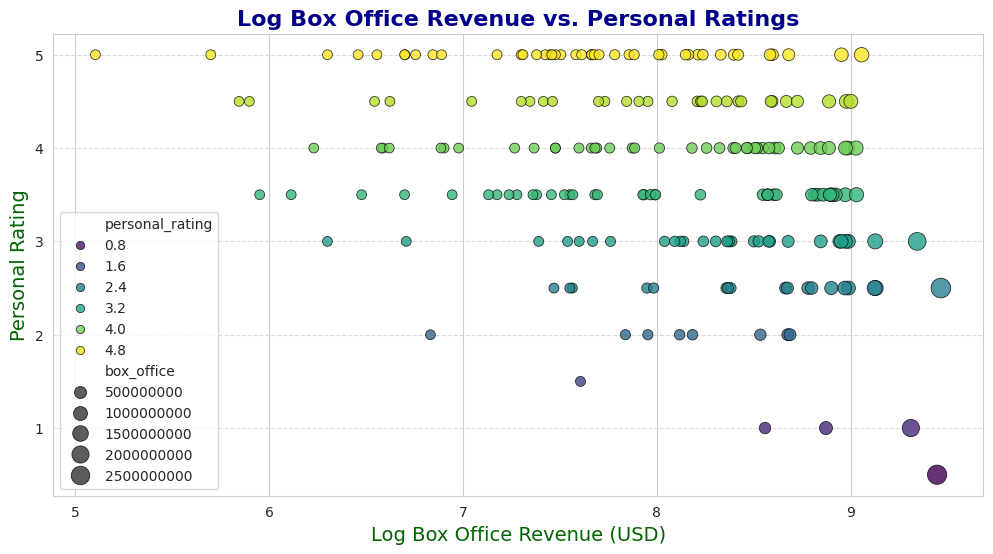

In [33]:
# Convert the movies data into a DataFrame
df = pd.DataFrame(movies)

# Filter out rows with missing box_office or personal_rating values
df = df.dropna(subset=['box_office', 'personal_rating'])

# Apply log scaling to the box office column to reduce density near 0
df['log_box_office'] = np.log10(df['box_office'] + 1)  # Add 1 to avoid log(0)

# Create a scatter plot for log-transformed box office vs. personal ratings
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    data=df,
    x='log_box_office',
    y='personal_rating',
    hue='personal_rating',  # Color points based on personal ratings
    palette='viridis',  # Use a vibrant color palette
    size='box_office',  # Size points based on box office revenue
    sizes=(50, 200),  # Scale point sizes
    alpha=0.8,  # Slight transparency
    edgecolor='black'  # Outline points
)

# Customize the plot
plt.title('Log Box Office Revenue vs. Personal Ratings', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Log Box Office Revenue (USD)', fontsize=14, color='darkgreen')
plt.ylabel('Personal Rating', fontsize=14, color='darkgreen')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.colorbar(scatter.collections[0].colorbar, label='Personal Rating')  # Add a color bar for reference
plt.tight_layout()

# Show the plot
plt.show()


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

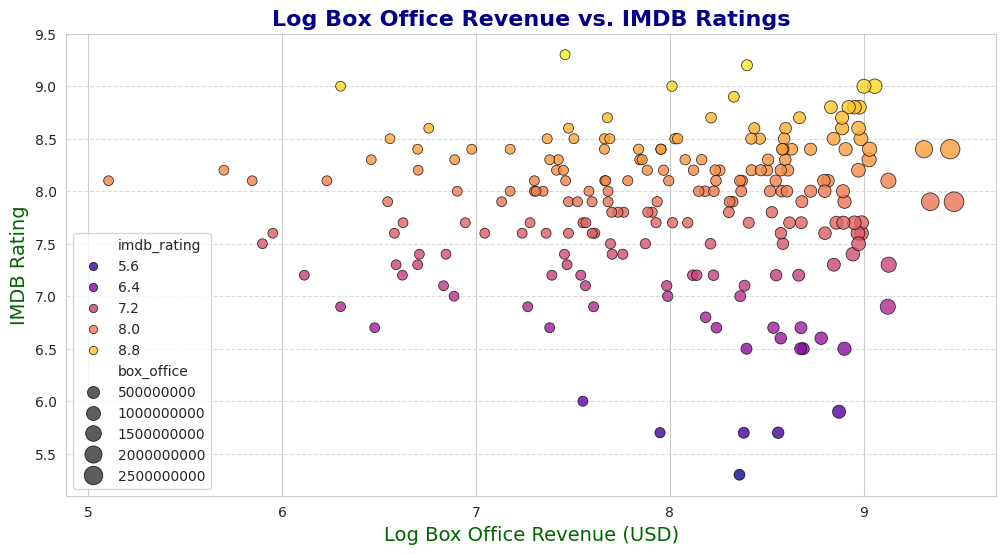

In [34]:
# Filter out rows with missing box_office or imdb_rating values
df = df.dropna(subset=['box_office', 'imdb_rating'])

# Apply log scaling to the box office column
df['log_box_office'] = np.log10(df['box_office'] + 1)

# Create a scatter plot for log-transformed box office vs. IMDB ratings
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    data=df,
    x='log_box_office',
    y='imdb_rating',
    hue='imdb_rating',  # Color points based on IMDB ratings
    palette='plasma',  # Use a vibrant color palette
    size='box_office',  # Size points based on box office revenue
    sizes=(50, 200),  # Scale point sizes
    alpha=0.8,  # Slight transparency
    edgecolor='black'  # Outline points
)

# Customize the plot
plt.title('Log Box Office Revenue vs. IMDB Ratings', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Log Box Office Revenue (USD)', fontsize=14, color='darkgreen')
plt.ylabel('IMDB Rating', fontsize=14, color='darkgreen')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.colorbar(scatter.collections[0].colorbar, label='IMDB Rating')  # Add a color bar for reference
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-41-41e09e1a7e2c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_box_office'] = np.log10(df['box_office'] + 1)


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

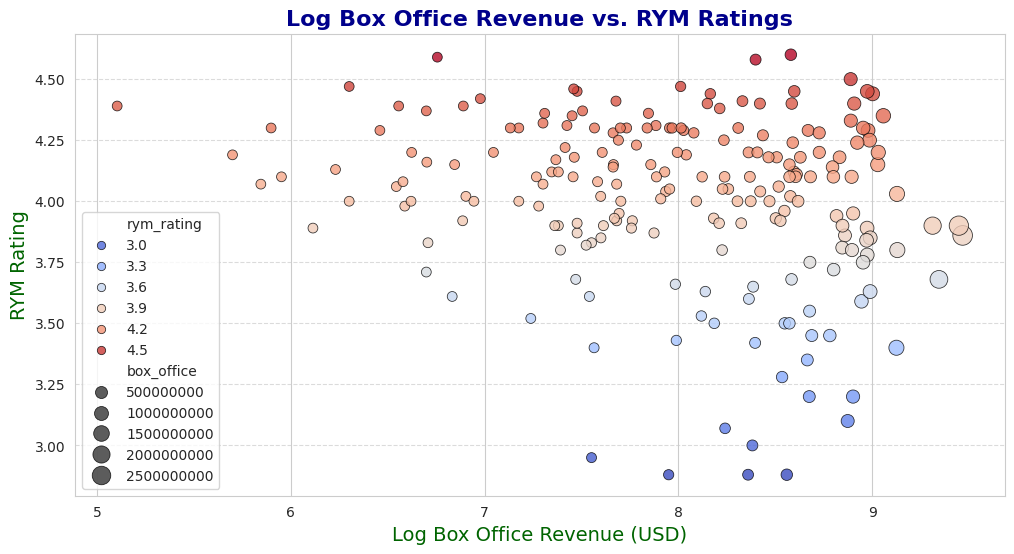

In [41]:
# Filter out rows with missing box_office or rym_rating values
df = df.dropna(subset=['box_office', 'rym_rating'])

# Apply log scaling to the box office column
df['log_box_office'] = np.log10(df['box_office'] + 1)

# Create a scatter plot for log-transformed box office vs. RYM ratings
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    data=df,
    x='log_box_office',
    y='rym_rating',
    hue='rym_rating',  # Color points based on RYM ratings
    palette='coolwarm',  # Use an engaging color palette
    size='box_office',  # Size points based on box office revenue
    sizes=(50, 200),  # Scale point sizes
    alpha=0.8,  # Slight transparency
    edgecolor='black'  # Outline points
)

# Customize the plot
plt.title('Log Box Office Revenue vs. RYM Ratings', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Log Box Office Revenue (USD)', fontsize=14, color='darkgreen')
plt.ylabel('RYM Rating', fontsize=14, color='darkgreen')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.colorbar(scatter.collections[0].colorbar, label='RYM Rating')  # Add a color bar for reference
plt.tight_layout()

# Show the plot
plt.show()


In [42]:
import pandas as pd
from scipy.stats import chi2_contingency

# Convert the movies data into a DataFrame
df = pd.DataFrame(movies)

# Filter out rows with missing duration or personal_rating values
df = df.dropna(subset=['duration', 'personal_rating'])

# Discretize duration and personal ratings into categories
df['duration_category'] = pd.qcut(df['duration'], q=3, labels=['Short', 'Medium', 'Long'])
df['personal_rating_category'] = pd.qcut(df['personal_rating'], q=3, labels=['Low', 'Medium', 'High'])

# Create a contingency table
contingency_table = pd.crosstab(df['duration_category'], df['personal_rating_category'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square test for Duration vs. Personal Ratings:")
print(f"Chi2 = {chi2}")
print(f"p-value = {p}")


Chi-square test for Duration vs. Personal Ratings:
Chi2 = 3.857335893879396
p-value = 0.4256574973586905


In [44]:
import pandas as pd
from scipy.stats import chi2_contingency

# Convert the movies data into a DataFrame
df = pd.DataFrame(movies)

# Filter out rows with missing budget or personal_rating values
df = df.dropna(subset=['budget', 'personal_rating'])

# Discretize budget and personal ratings into categories
df['budget_category'] = pd.qcut(df['budget'], q=3, labels=['Low', 'Medium', 'High'])
df['personal_rating_category'] = pd.qcut(df['personal_rating'], q=3, labels=['Low', 'Medium', 'High'])

# Create a contingency table
contingency_table = pd.crosstab(df['budget_category'], df['personal_rating_category'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square test for Budget vs. Personal Ratings:")
print(f"Chi2 = {chi2}")
print(f"p-value = {p}")


Chi-square test for Budget vs. Personal Ratings:
Chi2 = 29.650054568184277
p-value = 5.766561444289418e-06


In [45]:
# Filter out rows with missing release_date or personal_rating values
df = df.dropna(subset=['release_date', 'personal_rating'])

# Extract the release year from the release_date column
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

# Discretize release year and personal ratings into categories
df['release_year_category'] = pd.qcut(df['release_year'], q=3, labels=['Old', 'Recent', 'New'])
df['personal_rating_category'] = pd.qcut(df['personal_rating'], q=3, labels=['Low', 'Medium', 'High'])

# Create a contingency table
contingency_table = pd.crosstab(df['release_year_category'], df['personal_rating_category'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square test for Release Year vs. Personal Ratings:")
print(f"Chi2 = {chi2}")
print(f"p-value = {p}")


Chi-square test for Release Year vs. Personal Ratings:
Chi2 = 47.29976406726752
p-value = 1.3206921010073579e-09


In [46]:
# Filter out rows with missing genre or personal_rating values
df = df.dropna(subset=['genre', 'personal_rating'])

# Discretize personal ratings into categories
df['personal_rating_category'] = pd.qcut(df['personal_rating'], q=3, labels=['Low', 'Medium', 'High'])

# Create a contingency table
contingency_table = pd.crosstab(df['genre'], df['personal_rating_category'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square test for Genre vs. Personal Ratings:")
print(f"Chi2 = {chi2}")
print(f"p-value = {p}")


Chi-square test for Genre vs. Personal Ratings:
Chi2 = 64.22153060873914
p-value = 0.008895212264011259


Mean Squared Error on Test Set: 0.5542073863636363

Feature Importances:
                  Feature  Importance
1              rym_rating    0.522587
3            release_year    0.161346
2             imdb_rating    0.129750
0                  budget    0.087436
7            genre_Comedy    0.017143
9             genre_Crime    0.016851
11            genre_Drama    0.016002
13           genre_Horror    0.010747
6         genre_Biography    0.007409
19           genre_Sci-Fi    0.006901
5         genre_Animation    0.005298
20  genre_Science Fiction    0.005043
21         genre_Thriller    0.003259
10      genre_Documentary    0.003244
4         genre_Adventure    0.001870
12          genre_Fantasy    0.001583
18         genre_Romantic    0.001092
15          genre_Musical    0.000736
17          genre_Romance    0.000675
16          genre_Mystery    0.000546
22              genre_War    0.000426
23          genre_Western    0.000043
14            genre_Music    0.000015
8      genre_Co

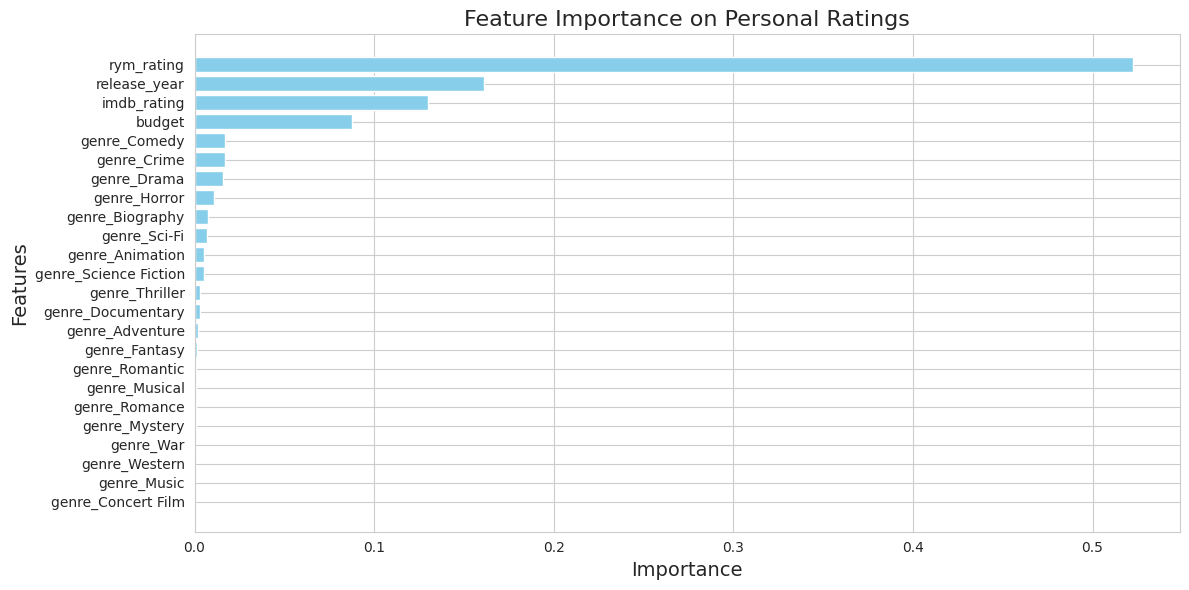

In [47]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Convert the movies data into a DataFrame
df = pd.DataFrame(movies)

# Filter out rows with missing values for the relevant columns
df = df.dropna(subset=['budget', 'rym_rating', 'imdb_rating', 'genre', 'release_date', 'personal_rating'])

# Extract the release year from the release_date column
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

# Convert genre into dummy variables (one-hot encoding)
df = pd.get_dummies(df, columns=['genre'], drop_first=True)

# Define features (X) and target (y)
X = df[['budget', 'rym_rating', 'imdb_rating', 'release_year'] + [col for col in df.columns if 'genre_' in col]]
y = df['personal_rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the most important features
print("\nFeature Importances:")
print(feature_importances)

# Plot feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importance on Personal Ratings', fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
